In [1]:
import pickle

In [2]:
with open("../../data/vgg/vgg_19_bn_numpy.pkl", 'rb') as f:
    data = pickle.load(f)

In [10]:
data["features.0.weight"].shape

(64, 3, 3, 3)

In [19]:
import numpy as np

np.save("test.npy",data)

In [11]:
import numpy as np
data_dict = np.load("../../data/vgg/vgg19_bn.npy").item()

In [73]:
for v in data_dict.keys():
    print(v)

features.0.weight
features.0.bias
features.1.weight
features.1.bias
features.1.running_mean
features.1.running_var
features.3.weight
features.3.bias
features.4.weight
features.4.bias
features.4.running_mean
features.4.running_var
features.7.weight
features.7.bias
features.8.weight
features.8.bias
features.8.running_mean
features.8.running_var
features.10.weight
features.10.bias
features.11.weight
features.11.bias
features.11.running_mean
features.11.running_var
features.14.weight
features.14.bias
features.15.weight
features.15.bias
features.15.running_mean
features.15.running_var
features.17.weight
features.17.bias
features.18.weight
features.18.bias
features.18.running_mean
features.18.running_var
features.20.weight
features.20.bias
features.21.weight
features.21.bias
features.21.running_mean
features.21.running_var
features.23.weight
features.23.bias
features.24.weight
features.24.bias
features.24.running_mean
features.24.running_var
features.27.weight
features.27.bias
features.28.we

In [2]:
data_dict["features.0.weight"].dtype

dtype('float32')

In [12]:
data_dict["features.0.weight"]

array([[[[ -3.21304903e-08,  -3.17172137e-08,  -6.71195082e-08],
         [ -2.93210469e-08,  -2.15963549e-08,  -5.32066018e-08],
         [ -5.33044577e-08,  -4.08317931e-08,  -6.64341400e-08]],

        [[  1.37100358e-07,   1.28476088e-07,   7.12703354e-08],
         [  1.54865049e-07,   1.51861499e-07,   8.35823926e-08],
         [  9.33915345e-08,   9.94513201e-08,   4.12844869e-08]],

        [[  1.74345871e-07,   1.78397443e-07,   1.05609033e-07],
         [  1.96444859e-07,   1.97694021e-07,   1.25601915e-07],
         [  1.19349394e-07,   1.34465353e-07,   5.96375287e-08]]],


       [[[ -6.34665795e-08,  -5.27138049e-08,  -3.85110361e-08],
         [ -1.43486929e-08,  -9.04263509e-09,  -1.71644334e-08],
         [  2.22822472e-08,   1.90840677e-08,   1.81496129e-09]],

        [[ -1.21905597e-08,  -6.19328278e-09,   8.50216786e-09],
         [  3.86180083e-08,   5.88690696e-08,   2.20822098e-08],
         [  6.25008809e-08,   7.05279177e-08,   2.71845071e-08]],

        [[  3

In [85]:
a = data_dict["classifier.0.weight"]
a
#data_dict["classifier.0.bias"].shape

array([[ 0.00775838, -0.00037521, -0.00156818, ..., -0.00309842,
        -0.00123116, -0.00063042],
       [ 0.00790953,  0.01107679,  0.01111131, ...,  0.00260628,
         0.00285636,  0.00295391],
       [-0.00464214,  0.00064389, -0.00385738, ..., -0.00041813,
         0.00247301,  0.00352502],
       ..., 
       [ 0.01809569,  0.00325614, -0.00018012, ..., -0.00105914,
         0.00051955,  0.00107123],
       [-0.0055055 , -0.00056649,  0.00040536, ..., -0.00597356,
        -0.00265321, -0.00283103],
       [ 0.0123805 ,  0.01304938,  0.01497073, ..., -0.00146141,
        -0.0038022 ,  0.00088394]], dtype=float32)

In [86]:
data_dict["features.0.bias"].shape

(64,)

In [88]:
data_dict["classifier.0.bias"].shape

(4096,)

In [17]:
data_dict["classifier.6.weight"].shape

(1000, 4096)

In [65]:
import tensorflow as tf
import numpy as np
import sys
import os

#Custom
sys.path.append(os.path.abspath("../"))
from helpers import load_image, load_image2

#IO
import matplotlib.pyplot as plt
%matplotlib inline


%load_ext autoreload
%autoreload 2

In [81]:
import vgg19_bn

DATA_PATH = '../../data/'


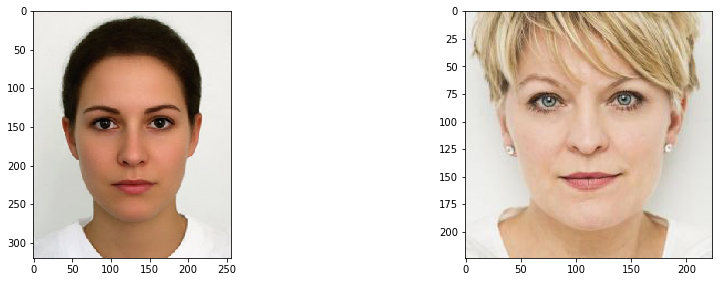

In [84]:
#Prepare some images rescaled to 224 by 224

img_source = load_image2("../../data/face/1.jpg")
img_style = load_image2("../../data/face/2.jpg")

plt.figure(1,figsize=(15, 10))
plt.subplot(221)
plt.imshow(img_source)

plt.subplot(222)
plt.imshow(img_style)
plt.show()

In [85]:
# Create batch to run both images in vgg

batch = [img_source, img_style]

batch1 = img_source.reshape((1, 224, 224, 3))
batch2 = img_style.reshape((1, 224, 224, 3))

batch = np.concatenate((batch1, batch2), 0)

ValueError: cannot reshape array of size 245760 into shape (1,224,224,3)

In [ ]:
with tf.Session() as sess:
    
    images = tf.placeholder("float", [2, 224, 224, 3])
    feed_dict = {images: batch}

    vgg = vgg19_bn.Vgg19_bn("../../data/vgg/vgg19_bn.npy")

    vgg.build(images)

    conv4_3 = sess.run(vgg.conv4_3, feed_dict=feed_dict)
    conv2_2 = sess.run(vgg.conv2_2, feed_dict=feed_dict)
    
    sess.close();

In [59]:
from sklearn import decomposition  

# Assumes layer is a [2, W, H, C] array
def get_K_repr(K, layer):

    content_maps = layer[0]
    reference_maps = layer[1] 
    
    content_maps = content_maps.reshape(content_maps.shape[0]*content_maps.shape[1], content_maps.shape[2])
    reference_maps = reference_maps.reshape(reference_maps.shape[0]*reference_maps.shape[1], reference_maps.shape[2]).transpose()
    
    res = content_maps.dot(reference_maps)

    estimator = decomposition.NMF(n_components = K, init = 'random', tol=5e-3, random_state=0)    
    W = estimator.fit_transform(res)
    H = estimator.components_
    
    a = layer[0].shape[0]
    
    W = W.reshape(layer[0].shape[0], layer[0].shape[1], K)
    H = H.reshape(K, layer[1].shape[0], layer[1].shape[1])
    
    return W, H

In [ ]:
K = 15
Ws, Hs = get_K_repr(K, conv4_3)


plt.figure(figsize=(15, 10))
plt.suptitle('Layer Name')

plt.subplot(16, 2, 1)
plt.imshow(img_source)

plt.gcf().text(0.05, 0.7, "Original ", fontsize=25)

plt.subplot(16, 2, 2)
plt.imshow(img_style)

for i in range(0,K):
        
    plt.gcf().text(0.05, 0.7, "K = " + str(i+1), fontsize=30)

    plt.subplot(16, 2, 2 + 2*i + 1)
    plt.imshow(Ws[:,:,i])
    #plt.colorbar()
    
    plt.subplot(16, 2, 2 + 2*i + 2)
    plt.imshow(Hs[i])
    #plt.colorbar()
    
    #plt.show()


plt.savefig('test.png')
    

In [13]:
import numpy as np
data_dict = np.load("../../data/vgg/vgg19.npy", encoding='latin1').item()

In [9]:
data_dict['conv1_1'][0].dtype

dtype('float32')

In [14]:
data_dict['conv1_1'][0]

array([[[[ 0.34119523,  0.09563112,  0.0177449 , ..., -0.11436455,
          -0.05099866, -0.00299793],
         [ 0.46418372,  0.03355668,  0.10245045, ..., -0.06945956,
          -0.04020201,  0.04048637],
         [ 0.39416704, -0.08419707, -0.03631314, ..., -0.10720515,
          -0.03804016,  0.04690642]],

        [[ 0.33999205,  0.13363543,  0.02129423, ..., -0.13025227,
          -0.16508926, -0.06969624],
         [ 0.41810837,  0.05260524,  0.09755926, ..., -0.09385028,
          -0.20492788, -0.0573062 ],
         [ 0.37740308, -0.07876257, -0.04775979, ..., -0.11827433,
          -0.19008617, -0.01889699]],

        [[-0.04484424,  0.06471398, -0.07631404, ..., -0.12629718,
          -0.29905206, -0.28253639],
         [-0.04806903, -0.00658076, -0.02234544, ..., -0.0878844 ,
          -0.3915486 , -0.34632796],
         [-0.04594866, -0.11583115, -0.14462094, ..., -0.12290562,
          -0.35782176, -0.27979308]]],


       [[[ 0.23215917,  0.13365699,  0.12134422, ..., -0